In [30]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [31]:
def synthetic_data(w,b,num_examples):
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

In [32]:
print('features:',features[0],'\nlabels',labels[0])

features: tensor([0.5545, 0.5128]) 
labels tensor([3.5590])


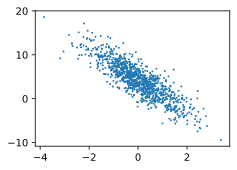

In [33]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1);

In [34]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定顺序
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

batch_size = 10

for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-0.5487, -0.1419],
        [-0.2538, -0.1747],
        [ 1.3192, -0.4602],
        [ 2.8567, -1.2319],
        [-1.6040, -0.8537],
        [ 2.5861,  0.7466],
        [-0.7402, -1.4392],
        [-0.8721, -0.9150],
        [-0.8667, -1.3387],
        [-0.1261, -0.2983]]) 
 tensor([[ 3.5943],
        [ 4.2675],
        [ 8.3931],
        [14.1042],
        [ 3.8920],
        [ 6.8334],
        [ 7.6112],
        [ 5.5662],
        [ 7.0293],
        [ 4.9483]])


In [35]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [36]:
def linreg(X,w,b):
    """线性回归模型"""
    return torch.matmul(X,w) + b

In [37]:
def squared_loss(y_hat,y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [38]:
def sgd(params,lr,batch_size):
    """小批量梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [39]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y) # X 和 y 的小批量损失
        # 因为 l 的形状是（batch_size,1），而不是一个标量。l 中的所有元素被加到一起求梯度
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w,b],lr,batch_size) # 使用参数的梯度更新
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch + 1},loss{float(train_l.mean()):f}')

epoch1,loss0.034571
epoch2,loss0.000130
epoch3,loss0.000049


In [40]:
print(f'w的估计误差:{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差:{true_b - b}')

w的估计误差:tensor([ 0.0003, -0.0004], grad_fn=<SubBackward0>)
b的估计误差:tensor([-7.7724e-05], grad_fn=<RsubBackward1>)
